In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aero_old_path = "../data/aerophoto/ortho_old/192"
aero_old = os.listdir(aero_old_path)
aero_new_path = "../data/aerophoto/ortho_new/192"
aero_new = os.listdir(aero_new_path)

In [3]:
idx = aero_old.index("toshima79558.png")
old_tmp_1 = cv2.imread(os.path.join(aero_old_path, aero_old[idx]), 1)
new_tmp_1 = cv2.imread(os.path.join(aero_new_path, aero_new[idx]), 1)
print(aero_old[idx])

toshima79558.png


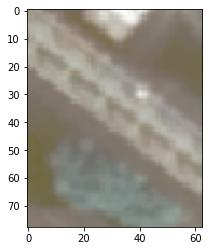

In [4]:
plt.imshow(old_tmp_1)

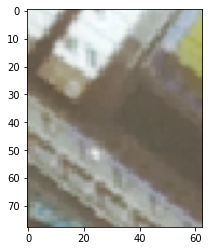

In [5]:
plt.imshow(new_tmp_1)

In [11]:
def get_match_features(src, target):
    akaze = cv2.AKAZE_create()
    kp1, des1 = akaze.detectAndCompute(src, None)
    kp2, des2 = akaze.detectAndCompute(target, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches = bf.match(des1, des2)

    matches = sorted(matches, key=lambda x: x.distance)
    print(matches)
    good_match_rate = 0.5
    good = matches[:int(len(matches) * good_match_rate)]
    src_pts = np.float32(
            [kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32(
           [kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    cv2.imwrite('draw_match.jpg', cv2.drawMatches(src, kp1, target, kp2, matches[:10], None, flags=2))
    return src_pts, dst_pts

In [12]:
get_match_features(new_tmp_1, old_tmp_1)

[]


(array([], shape=(0, 1, 2), dtype=float32),
 array([], shape=(0, 1, 2), dtype=float32))